# Disease prediction

In this lab we're gonna work with data from heart disease dataset. We're gonna start to load the dataset from Kaggle, and get info on what the features definition is. Note that there are lot of errors in this dataset, for example: negative blood pressure och blood pressures that is unreasonable high.

### Quick check with google give me these values
* Age Range	Normal Blood Pressure Range (mmHg)
* Newborn	60/30 - 90/60
* Infants	85/50 - 95/65
* Children	90/55 - 110/75
* Adolescents	100/60 - 120/80
* Adults	90/60 - 120/80
* Adults	120/80 - 140/90
* Adults	140/90 - 160/100
* Adults	160/100 - 180/110
* Adults	180/110 or higher
# TODO: Get official statistics of this. 

There are 3 types of input features:

* Objective: factual information;
* Examination: results of medical examination;
* Subjective: information given by the patient.

## Features
* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [130]:
import os


# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# data science
import pandas as pd 
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from scipy.stats import norm
from scipy import stats

from scipy.stats import norm


# Set a default plt style
plt.style.use('ggplot')

In [131]:
file = '/Users/joeloscarsson/Documents/www/Machine-Learning/Projects/data3/cardio_train.csv'

In [132]:
cardio_train_df = pd.read_csv(file, delimiter=';')
nRow, nCol = cardio_train_df.shape
print(f"There are {nRow} rows and {nCol} columns")
print(cardio_train_df.columns)

There are 70000 rows and 13 columns
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [133]:
cardio_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [134]:
# Creating a dictionary to map the values to
cholesterol_map = {1: 'Normal', 2: 'Above normal', 3: 'Well above normal'}
glucose_map = {1: 'Normal', 2: 'Above normal', 3: 'Well above normal'}
smoking_map = {0: 'No', 1: 'Yes'}
alcohol_map = {0: 'No', 1: 'Yes'}
active_map = {0: 'No', 1: 'Yes'}
cardio_map = {0: 'No', 1: 'Yes'}
gender_map = {1: 'Female', 2:'Male'}

# Replacing the values in the dataframe
cardio_train_df['cholesterol'] = cardio_train_df['cholesterol'].replace(cholesterol_map)
cardio_train_df['gluc'] = cardio_train_df['gluc'].replace(glucose_map)
cardio_train_df['smoke'] = cardio_train_df['smoke'].replace(smoking_map)
cardio_train_df['alco'] = cardio_train_df['alco'].replace(alcohol_map)
cardio_train_df['active'] = cardio_train_df['active'].replace(active_map)
cardio_train_df['cardio'] = cardio_train_df['cardio'].replace(cardio_map)


# Fixing the age to the correct format. I did this way to late in the lab, but since that column never were of interest
# I didn't bother to change it.
cardio_train_df['age'] = cardio_train_df['age'].apply(lambda x: x/365)

# 2.0 EDA

a) How many are positive for hear disease and how many is negative?

We have this feature variable so we're take a closer look:

* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

No     35021
Yes    34979
Name: cardio, dtype: int64


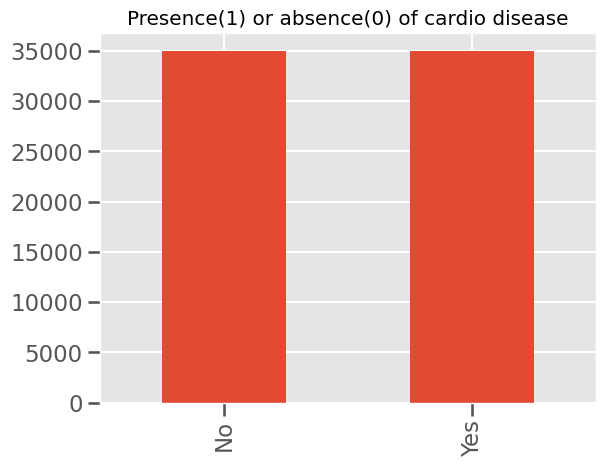

In [135]:
# We have 2 classes, 0 and 1. 0 means no cardio disease and 1 means cardio disease.
cardio_train_df['cardio'].value_counts().plot(kind='bar', title='Presence(1) or absence(0) of cardio disease')
print(cardio_train_df['cardio'].value_counts())


Almost 50/50

b) The share of how many normal, over normal and far above normal cholestrol

In [136]:
cardio_train_df['cholesterol'].value_counts()

Normal               52385
Above normal          9549
Well above normal     8066
Name: cholesterol, dtype: int64

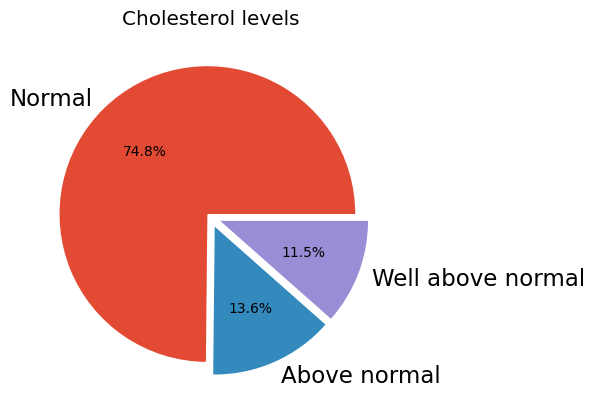

In [137]:
explode = (0.03, 0.07, 0.07)
plt.pie(cardio_train_df['cholesterol'].value_counts(), labels=['Normal', 'Above normal', 'Well above normal'], autopct='%1.1f%%', explode= explode );
plt.title('Cholesterol levels');

c) Age distribution histogram

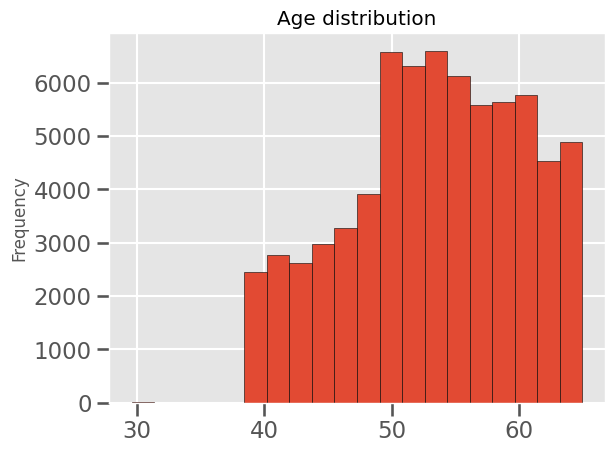

In [138]:
cardio_train_series = cardio_train_df['age']

cardio_train_series.plot(kind='hist', bins=20, title='Age distribution', edgecolor='black', linewidth=0.4);


d) Portion that smokes

In [139]:
cardio_train_df['smoke']

0         No
1         No
2         No
3         No
4         No
        ... 
69995    Yes
69996     No
69997     No
69998     No
69999     No
Name: smoke, Length: 70000, dtype: object

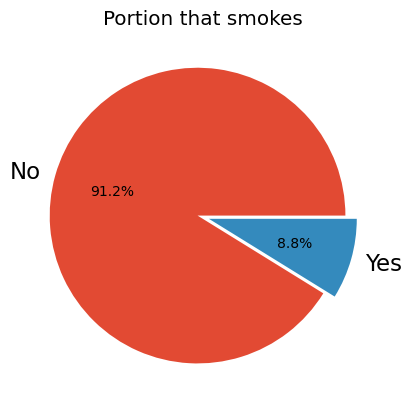

In [140]:
explode = (0.04, 0.04)
plt.pie(cardio_train_df['smoke'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', explode= explode );
plt.title('Portion that smokes');

e) How is the weight distribution?

In [141]:
cardio_train_df

id        age  gender  height  weight  ap_hi  ap_lo  \
0          0  50.391781       2     168    62.0    110     80   
1          1  55.419178       1     156    85.0    140     90   
2          2  51.663014       1     165    64.0    130     70   
3          3  48.282192       2     169    82.0    150    100   
4          4  47.873973       1     156    56.0    100     60   
...      ...        ...     ...     ...     ...    ...    ...   
69995  99993  52.712329       2     168    76.0    120     80   
69996  99995  61.920548       1     158   126.0    140     90   
69997  99996  52.235616       2     183   105.0    180     90   
69998  99998  61.454795       1     163    72.0    135     80   
69999  99999  56.273973       1     170    72.0    120     80   

             cholesterol          gluc smoke alco active cardio  
0                 Normal        Normal    No   No    Yes     No  
1      Well above normal        Normal    No   No    Yes    Yes  
2      Well above normal        Normal    No   No     No    Yes  
3                 Normal        Normal    No   No    Yes    Yes  
4                 Normal        Normal    No   No     No     No  
...                  ...           ...   ...  ...    ...    ...  
69995             Normal        Normal   Yes   No    Yes     No  
69996       Above normal  Above normal    No   No    Yes    Yes  
69997  Well above normal        Normal    No  Yes     No    Yes  
69998             Normal  Above normal    No   No     No    Yes  
69999       Above normal        Normal    No   No    Yes     No  

[70000 rows x 13 columns]

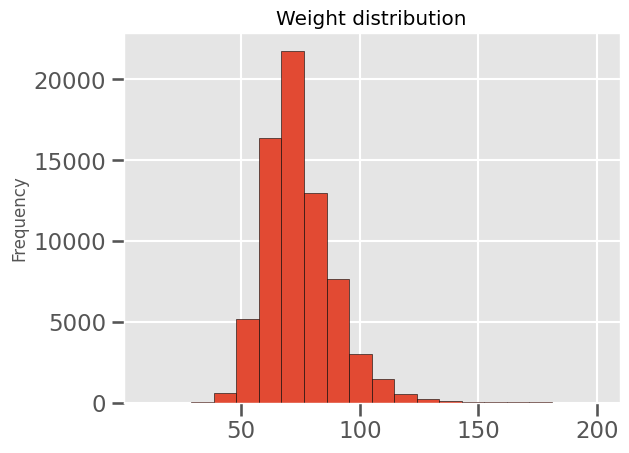

In [142]:
cardio_train_df['weight'].plot(kind='hist', bins=20, title='Weight distribution', edgecolor='black', linewidth=0.4);

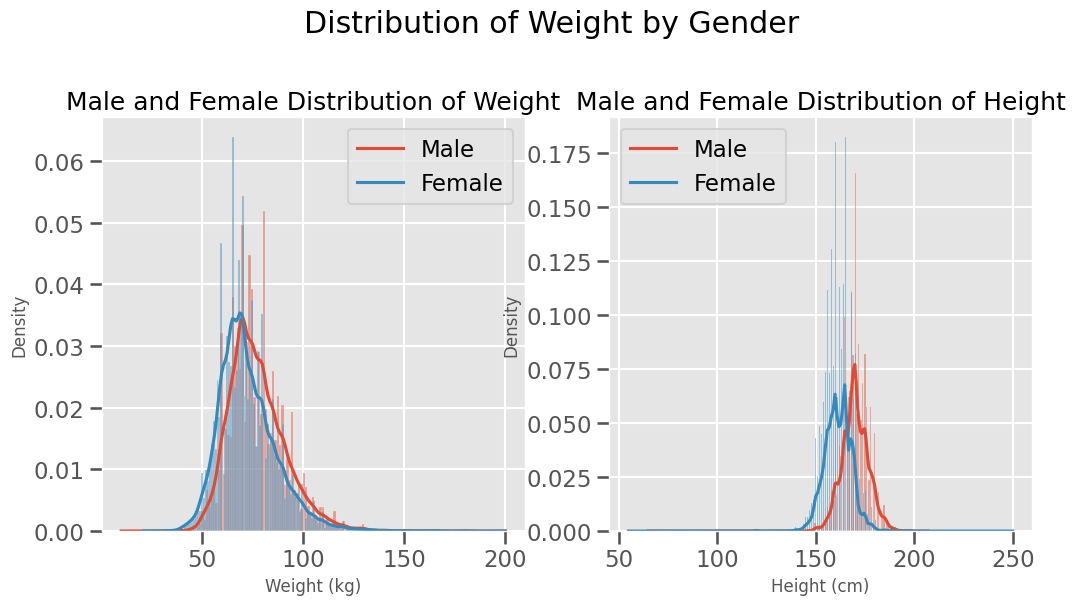

In [143]:
fig, ax = plt.subplots(1,2, figsize= (12,6))

# first plot
sns.histplot(ax = ax[0], x = "weight", data=cardio_train_df[cardio_train_df["gender"] == 2], stat="density", kde=True) # male  
sns.histplot(ax = ax[0], x = "weight", data=cardio_train_df[cardio_train_df["gender"] == 1], stat="density", kde=True)# female
sns.set_context("talk")
fig.subplots_adjust(top=.8)
fig.suptitle('Distribution of Weight by Gender')

ax[0].set(title="Male and Female Distribution of Weight", xlabel= "Weight (kg)", ylabel= "Density")
ax[0].legend(["Male","Female"])

# second plot
sns.histplot(ax = ax[1], x = "height", data=cardio_train_df[cardio_train_df["gender"] == 2], stat="density", kde=True) # Male
sns.histplot(ax = ax[1], x = "height", data=cardio_train_df[cardio_train_df["gender"] == 1], stat="density", kde=True) # female

ax[1].set(title="Male and Female Distribution of Height", xlabel= "Height (cm)", ylabel= "Density")
ax[1].legend(["Male","Female"])

plt.show()

g)  How big share of women and men has heart disease?


# TODO: Plot this correctly

In [144]:
cardio_train_df.head()

id        age  gender  height  weight  ap_hi  ap_lo        cholesterol  \
0   0  50.391781       2     168    62.0    110     80             Normal   
1   1  55.419178       1     156    85.0    140     90  Well above normal   
2   2  51.663014       1     165    64.0    130     70  Well above normal   
3   3  48.282192       2     169    82.0    150    100             Normal   
4   4  47.873973       1     156    56.0    100     60             Normal   

     gluc smoke alco active cardio  
0  Normal    No   No    Yes     No  
1  Normal    No   No    Yes    Yes  
2  Normal    No   No     No    Yes  
3  Normal    No   No    Yes    Yes  
4  Normal    No   No     No     No

In [145]:
# Sorting patients by gender and if they have cardio disease or not
male = cardio_train_df.query('gender > 1')
female = cardio_train_df.query('gender < 2')
female_disease = female[female['cardio'] == 1]
male_disease = male[male['cardio'] == 1]
print(male.shape)
print(female.shape)

(24470, 13)
(45530, 13)


Yes    12363
No     12107
Name: cardio, dtype: int64


<Axes: title={'center': 'yes and no'}>

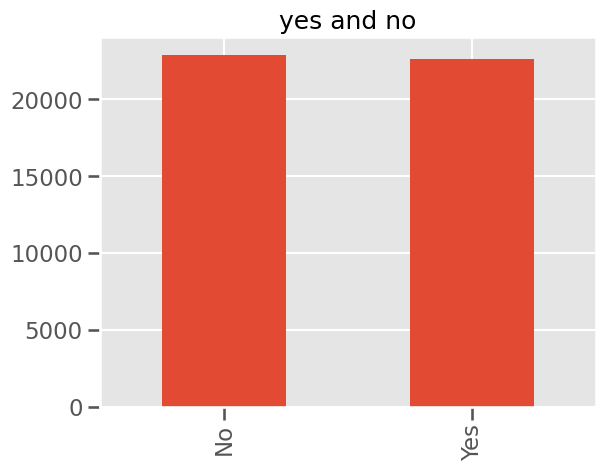

In [146]:
male['cardio'].value_counts().plot(kind='bar', title='yes and no')
print(male['cardio'].value_counts())
female['cardio'].value_counts().plot(kind='bar', title='yes and no')

--------------
Feature engiinering BMI

Create a feature for BMI(Body mass index)

* a) Throw the samples with not possible BMIers and outliers. Note that it can be hard to decide in which range of BMI we gonna use. Describe how you came up with your limits.


* b) Create a categorial BMI-feature with categories: normal range, overweight, obese (class I), obese (class II), obese(class III)

The limits i'm gonna use that came from https://en.wikipedia.org/wiki/Body_mass_index
Note that this is Basic categories and BMI can change for different regions, for instance Hong kong or Japan.

is:
*                 BMI (kg/m^^2) (BMI Prime)
* Normal range	18.5 – 24.9	0.74 – 0.99
* Overweight (Pre-obese)	25.0 – 29.9	1.00 – 1.19
* Obese (Class I)	30.0 – 34.9	1.20 – 1.39
* Obese (Class II)	35.0 – 39.9	1.40 – 1.59
* Obese (Class III)	≥ 40.0	≥ 1.60  # Highest threshold 55

In [147]:
# Calculate BMI for each person and creating a new column
cardio_train_df['bmi'] = cardio_train_df['weight'] / ((cardio_train_df['height'] / 100) ** 2)
cardio_train_df.head()

id        age  gender  height  weight  ap_hi  ap_lo        cholesterol  \
0   0  50.391781       2     168    62.0    110     80             Normal   
1   1  55.419178       1     156    85.0    140     90  Well above normal   
2   2  51.663014       1     165    64.0    130     70  Well above normal   
3   3  48.282192       2     169    82.0    150    100             Normal   
4   4  47.873973       1     156    56.0    100     60             Normal   

     gluc smoke alco active cardio        bmi  
0  Normal    No   No    Yes     No  21.967120  
1  Normal    No   No    Yes    Yes  34.927679  
2  Normal    No   No     No    Yes  23.507805  
3  Normal    No   No    Yes    Yes  28.710479  
4  Normal    No   No     No     No  23.011177

In [148]:
cardio_train_df['bmi'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

We can see that there is some impossible values for BMI in this dataset. For instance someone with a BMI of 298? and 3.4? That is unreasonable.

In [149]:
# Plot a boxplot on outliers for the BMI column to see outliers

fig = px.box(cardio_train_df, x='bmi');

fig.show()

Removing outliers based on the the limits that i wrote above. Note that i increased the threshold to 50 to be able to make obese(class III):

* kg < 15 BMI
* kg > 50 BMI

# TODO: We used Tukeys rule to remove outliers. 

## Fråga domän expert

In [150]:
# # TODO: Tukeys rule fråga om denna: eftersom vi bestämmer ju själva hur många outliers vi vill ha som är baserat på BMI rangen...

# def clean_outliers(cardio_train_df, column='bmi'):
#     q1 = cardio_train_df[column].quantile(0.25)
#     q3 = cardio_train_df[column].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - (1.5 * iqr)
#     upper_bound = q3 + (1.5 * iqr)
#     cardio_train_df = cardio_train_df[(cardio_train_df[column] > lower_bound) & (cardio_train_df[column] < upper_bound)]
#     return cardio_train_df

# cardio_train_df = clean_outliers(cardio_train_df, column='bmi')
# cardio_train_df.describe()

In [151]:
def filter_bmi_outliers(cardio_train_df, lower_bound=15, upper_bound=50, column='bmi'):
    mask = (cardio_train_df[column] > lower_bound) & (cardio_train_df[column] < upper_bound)
    cardio_train_df = cardio_train_df.loc[mask]
    return cardio_train_df

cardio_train_df = filter_bmi_outliers(cardio_train_df)
cardio_train_df['bmi'].describe()

count    69729.000000
mean        27.416604
std          5.058418
min         15.012197
25%         23.875115
50%         26.365603
75%         30.119376
max         50.000000
Name: bmi, dtype: float64

* b) Create a categorial BMI-feature with categories: normal range, overweight, obese (class I), obese (class II), obese(class III)
* Normal range	18.5 – 24.9
* Overweight (Pre-obese)	25.0 – 29.9	1.00 – 1.19
* Obese (Class I)	30.0 – 34.9	1.20 – 1.39
* Obese (Class II)	35.0 – 39.9	1.40 – 1.59
* Obese (Class III)	≥ 40.0	≥ 1.60  # Highest threshold 55

In [152]:
cardio_train_df['normal_range'] = cardio_train_df['bmi']
cardio_train_df['overweight'] = cardio_train_df['bmi']
cardio_train_df['obese_class1'] = cardio_train_df['bmi']
cardio_train_df['obese_class2'] = cardio_train_df['bmi']
cardio_train_df['obese_class3'] = cardio_train_df['bmi']

# cardio_train_df['normal_range'] = cardio_train_df['normal_range'].apply(lambda x: 1 if x > 18.5 else 0)

def in_normal_range(x):
    if x >= 18.5 and x <= 24.9:
        return 1
    else:
        return 0
def in_overweight_range(x):
    if x >= 25 and x <= 29.9:
        return 1
    else:
        return 0
def in_obese_range_class1(x):
    if x >= 30 and x <= 34.9:
        return 1
    else:
        return 0
def in_obese_range_class2(x):
    if x >= 35 and x <= 39.9:
        return 1
    else:
        return 0
def in_obese_range_class3(x):
    if x >= 40:
        return 1
    else:
        return 0
    
cardio_train_df['normal_range'] = cardio_train_df['normal_range'].apply(in_normal_range)
cardio_train_df['overweight'] = cardio_train_df['overweight'].apply(in_overweight_range)
cardio_train_df['obese_class1'] = cardio_train_df['obese_class1'].apply(in_obese_range_class1)
cardio_train_df['obese_class2'] = cardio_train_df['obese_class2'].apply(in_obese_range_class2)
cardio_train_df['obese_class3'] = cardio_train_df['obese_class3'].apply(in_obese_range_class3)
#--------------------------------------------#
# Changing to categorical values

# Mapping into a dictionary
normal_range_map  = {1: 'Yes', 0:'No'}
overweight_map = {1: 'Yes', 0:'No'}
obese_class1_map = {1: 'Yes', 0:'No'}
obese_class2_map = {1: 'Yes', 0:'No'}
obese_class3_map = {1: 'Yes', 0:'No'}

# # Replacing the values in the dataframe
cardio_train_df['normal_range'] = cardio_train_df['normal_range'].replace(normal_range_map)
cardio_train_df['overweight'] = cardio_train_df['overweight'].replace(overweight_map)
cardio_train_df['obese_class1'] = cardio_train_df['obese_class1'].replace(obese_class1_map)
cardio_train_df['obese_class2'] = cardio_train_df['obese_class2'].replace(obese_class2_map)
cardio_train_df['obese_class3'] = cardio_train_df['obese_class3'].replace(obese_class3_map)

cardio_train_df.head()


/var/folders/q6/3g_x1fsd1gj1bssql2_z81c40000gn/T/ipykernel_2602/2818791003.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q6/3g_x1fsd1gj1bssql2_z81c40000gn/T/ipykernel_2602/2818791003.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q6/3g_x1fsd1gj1bssql2_z81c40000gn/T/ipykernel_2602/2818791003.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

id        age  gender  height  weight  ap_hi  ap_lo        cholesterol  \
0   0  50.391781       2     168    62.0    110     80             Normal   
1   1  55.419178       1     156    85.0    140     90  Well above normal   
2   2  51.663014       1     165    64.0    130     70  Well above normal   
3   3  48.282192       2     169    82.0    150    100             Normal   
4   4  47.873973       1     156    56.0    100     60             Normal   

     gluc smoke alco active cardio        bmi normal_range overweight  \
0  Normal    No   No    Yes     No  21.967120          Yes         No   
1  Normal    No   No    Yes    Yes  34.927679           No         No   
2  Normal    No   No     No    Yes  23.507805          Yes         No   
3  Normal    No   No    Yes    Yes  28.710479           No        Yes   
4  Normal    No   No     No     No  23.011177          Yes         No   

  obese_class1 obese_class2 obese_class3  
0           No           No           No  
1           No           No           No  
2           No           No           No  
3           No           No           No  
4           No           No           No

Throw away the samples with unreasonable high or low blood pressure(Outliers). It is not trivial to put thresholds. Create a feature for bloodpressure-categories. And explain how i'm coming up with these limits.


---
"Two numbers create a blood pressure reading. Systolic pressure (top number) indicates the pressure in your arteries when your heart beats and pumps out blood. Diastolic pressure (bottom number) is the reading of the pressure in your arteries between beats of your heart."

https://www.healthline.com/health/high-blood-pressure-hypertension#symptoms


Blood pressure category | Systolic(mm HG) | Diastolic(mm Hg)
- Healthy                 | less than 120   | and less than 80
- Elevated                | 120-129         | and less than 80
- Stage 1 hypertension    | 130-139         | or 80-89
- Stage 2 hypertension    | 140 or higher   | or 90 or higher
- Hypertension crisis     | over 180        | or over 120

I'm gonna sort Healthy and elevated as the same
* Stage 1 hypertension
* Stage 2 hypertension
* Hypertension crisis

---
Columns 
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
----

In [153]:
## First EDA on the data and see which outliers there is
cardio_train_df.describe()

id           age        gender        height        weight  \
count  69729.000000  69729.000000  69729.000000  69729.000000  69729.000000   
mean   49975.141864     53.337372      1.350012    164.444750     74.057891   
std    28848.990139      6.759985      0.476977      7.863854     13.981950   
min        0.000000     29.583562      1.000000     98.000000     28.000000   
25%    25014.000000     48.391781      1.000000    159.000000     65.000000   
50%    50009.000000     53.978082      1.000000    165.000000     72.000000   
75%    74889.000000     58.427397      2.000000    170.000000     82.000000   
max    99999.000000     64.967123      2.000000    207.000000    180.000000   

              ap_hi         ap_lo           bmi  
count  69729.000000  69729.000000  69729.000000  
mean     128.797057     96.567569     27.416604  
std      154.303473    188.572870      5.058418  
min     -150.000000    -70.000000     15.012197  
25%      120.000000     80.000000     23.875115  
50%      120.000000     80.000000     26.365603  
75%      140.000000     90.000000     30.119376  
max    16020.000000  11000.000000     50.000000

We can notice some impossible values in ap_hi and ap_lo, so we gonna filter them out. For instance api_hi has -150 in systolic blood pressure.

In [154]:
# Plotting outliers
fig = px.box(cardio_train_df, x='ap_hi')
fig.show()

In [155]:
fig = px.box(cardio_train_df, x='ap_lo')
fig.show()

In [156]:
# Men om jag gör på systolic outliers så kanske det inte är samma personer som försvinner??

# Remove over threshold 195
# Remove under threshold 60


def clean_systolic_outliers(cardio_train_df, lower_bound=60, upper_bound=210, column='ap_hi'):
    mask = (cardio_train_df[column] > lower_bound) & (cardio_train_df[column] < upper_bound)
    cardio_train_df = cardio_train_df.loc[mask]
    return cardio_train_df

def clean_diastolic_outliers(cardio_train_df, lower_bound=50, upper_bound=140, column='ap_lo'):
    mask = (cardio_train_df[column] > lower_bound) & (cardio_train_df[column] < upper_bound)
    cardio_train_df = cardio_train_df.loc[mask]
    return cardio_train_df



cardio_train_df = clean_systolic_outliers(cardio_train_df)
cardio_train_df = clean_diastolic_outliers(cardio_train_df)

# print(cardio_train_df['ap_hi'].describe())
# print(cardio_train_df['ap_lo'].describe())


In [157]:
# Healthy: Systolic < 120 and Diastolic < 80
# Prehypertension: Systolic 120-139 or Diastolic 80-89
# Stage 1 Hypertension: Systolic 140-159 or Diastolic 90-99
# Stage 2 Hypertension: Systolic 160-179 or Diastolic 100-109
# Hypertensive Crisis: Systolic > 180 or Diastolic > 110

def categorize_bp(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 'Healthy'
    elif 120 <= row['ap_hi'] <= 129 and row['ap_lo'] < 80:
        return 'Elevated'
    elif (130 <= row['ap_hi'] <= 139) or (80 <= row['ap_lo'] <= 89):
        return 'Stage 1 hyperpetension'
    elif (140 <= row['ap_hi'] <= 180) or (90 <= row['ap_lo'] <= 120):
        return 'Stage 2 hyperpetension'
    elif (row['ap_hi'] > 180) or (row['ap_lo'] > 120):
        return 'Hypertension crisis'

# Apply the function to create a new column 'BP_Category'
cardio_train_df['BP_Category'] = cardio_train_df.apply(categorize_bp, axis=1)

In [158]:
cardio_train_df.head()

id        age  gender  height  weight  ap_hi  ap_lo        cholesterol  \
0   0  50.391781       2     168    62.0    110     80             Normal   
1   1  55.419178       1     156    85.0    140     90  Well above normal   
2   2  51.663014       1     165    64.0    130     70  Well above normal   
3   3  48.282192       2     169    82.0    150    100             Normal   
4   4  47.873973       1     156    56.0    100     60             Normal   

     gluc smoke alco active cardio        bmi normal_range overweight  \
0  Normal    No   No    Yes     No  21.967120          Yes         No   
1  Normal    No   No    Yes    Yes  34.927679           No         No   
2  Normal    No   No     No    Yes  23.507805          Yes         No   
3  Normal    No   No    Yes    Yes  28.710479           No        Yes   
4  Normal    No   No     No     No  23.011177          Yes         No   

  obese_class1 obese_class2 obese_class3             BP_Category  
0           No           No           No  Stage 1 hyperpetension  
1           No           No           No  Stage 2 hyperpetension  
2           No           No           No  Stage 1 hyperpetension  
3           No           No           No  Stage 2 hyperpetension  
4           No           No           No                 Healthy

// Creating one more feature for bloodtype-categories:

Blood pressure category | Systolic(mm HG) | Diastolic(mm Hg)
- Healthy                 | less than 120   | and less than 80
- Elevated                | 120-129         | and less than 80
- Stage 1 hypertension    | 130-139         | or 80-89
- Stage 2 hypertension    | 140 or higher   | or 90 or higher
- Hypertension crisis     | over 180        | or over 120

Choosen my limits where lowest possible systolic pressure is 60. And highest 210. These are very extreme values but should be considered because even though the most people is in a normal distribution i don't want to clean the outliers 

# 2.2.0 Visuals share with disease

In [159]:
# list(enumerate(feature))

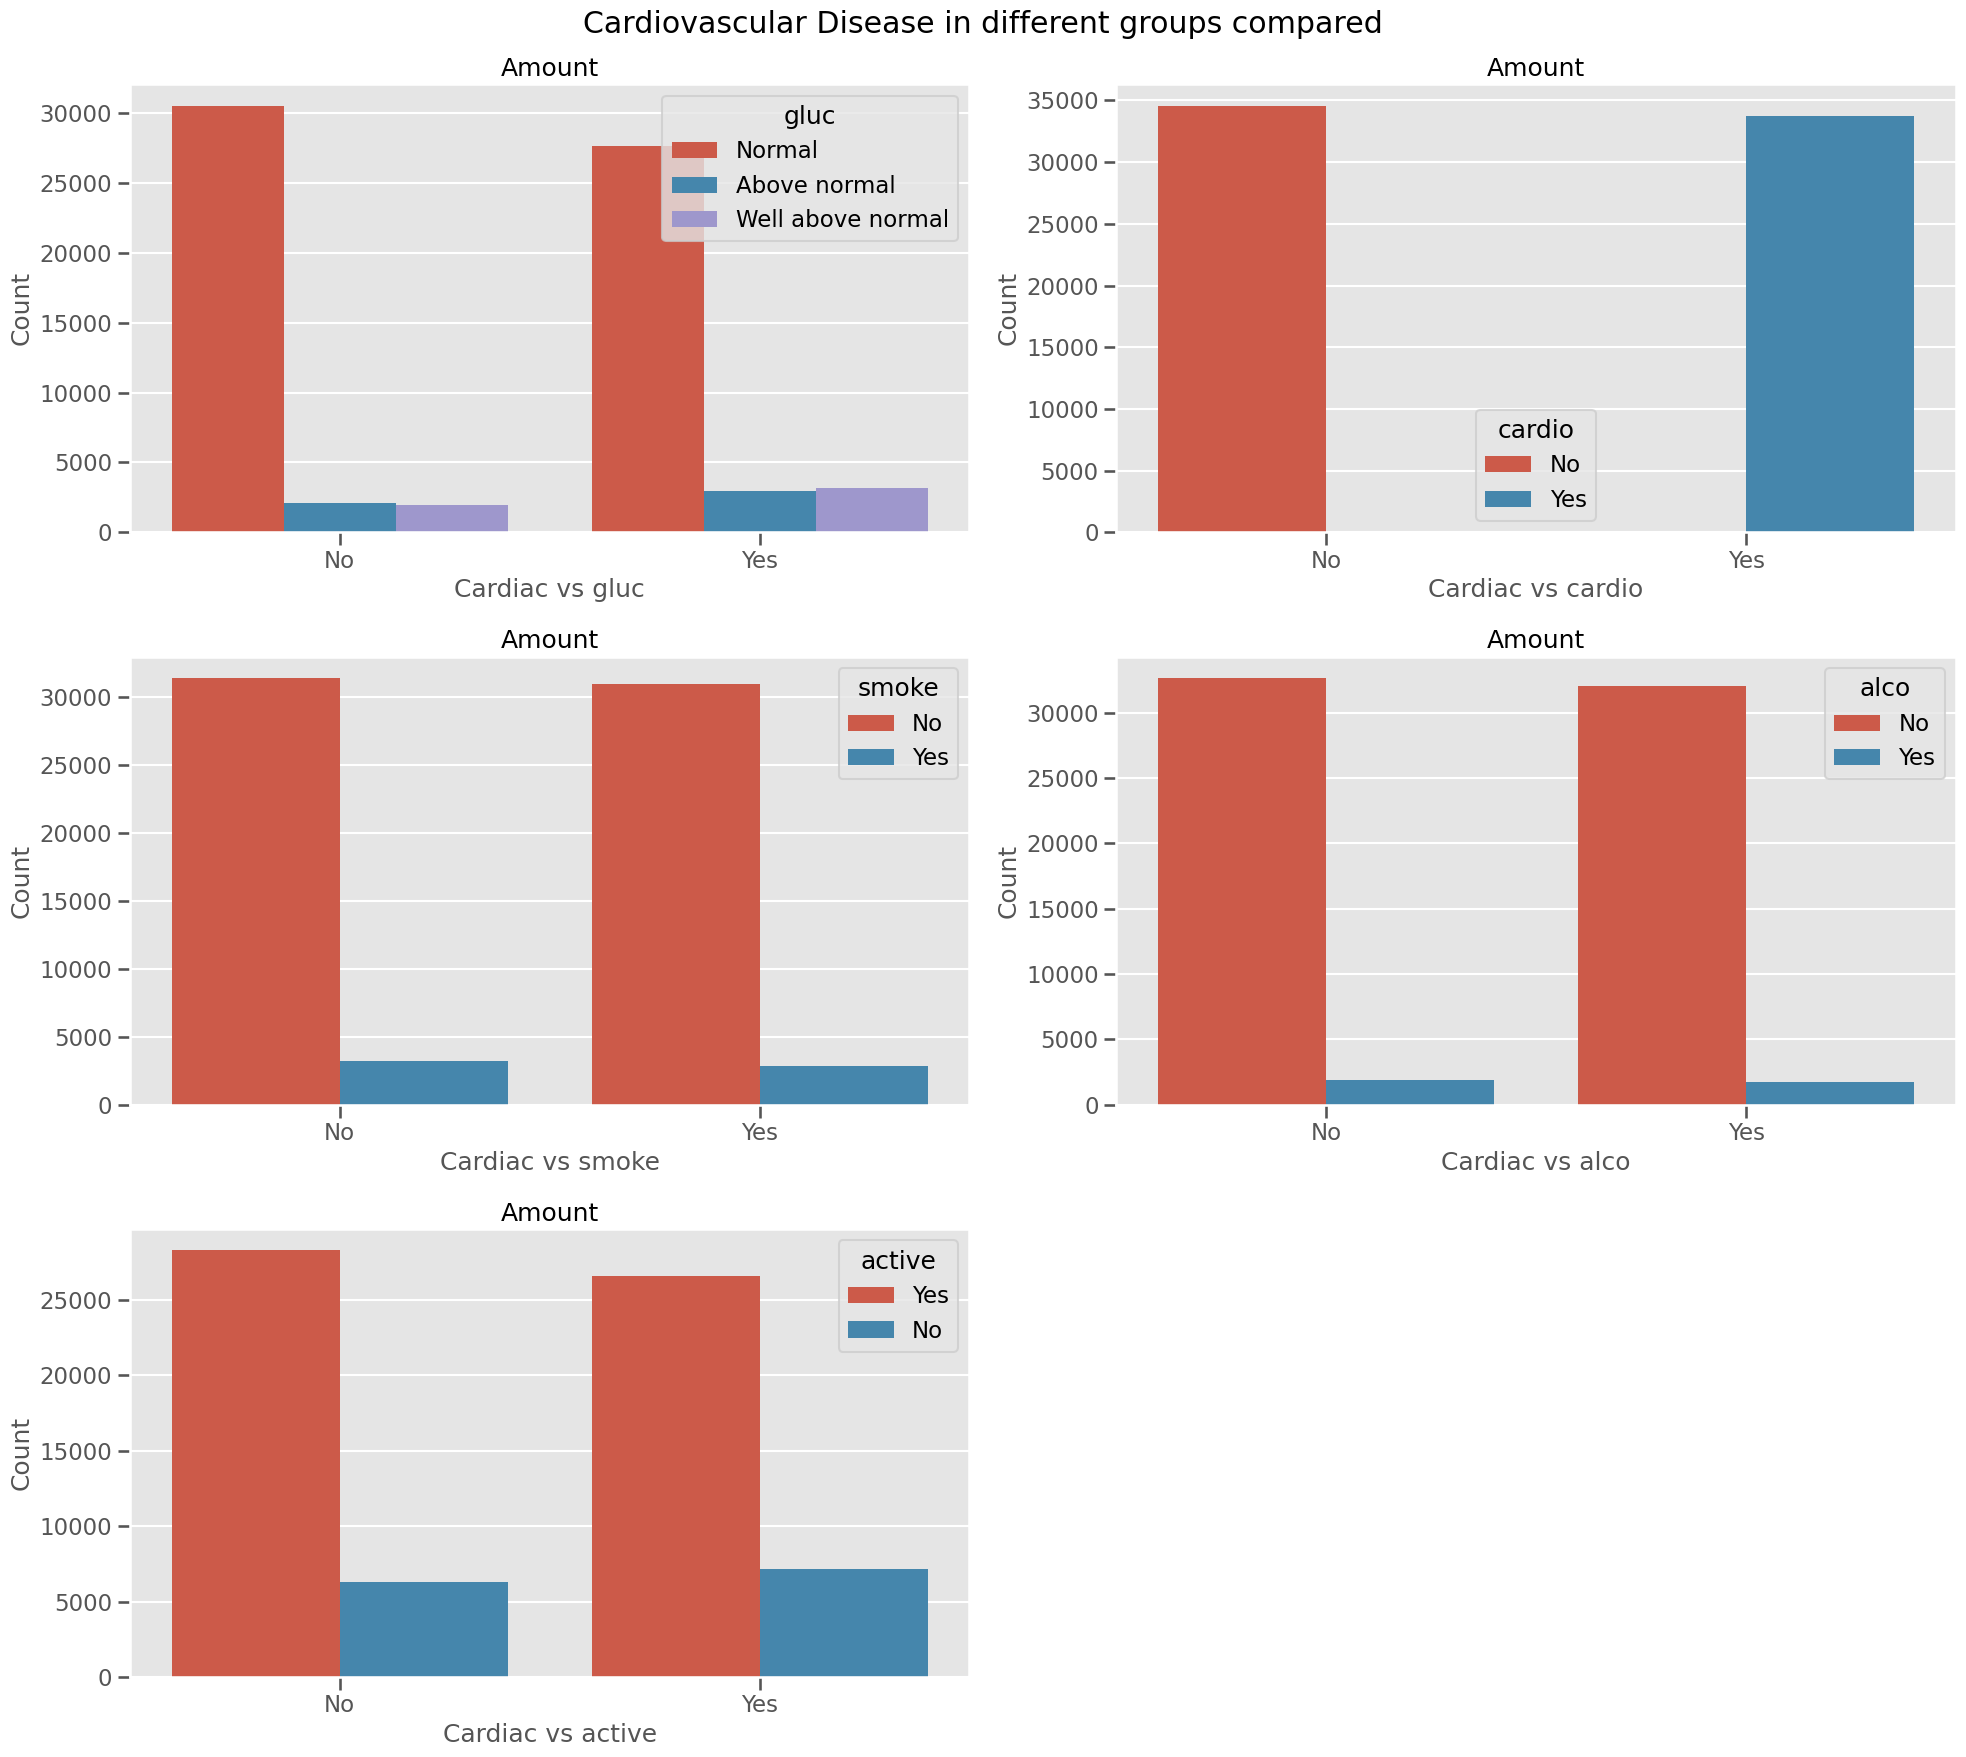

In [160]:
feature = [
    "gluc",
    "cardio",
    "smoke",
    "alco",
    "active",
]

fig = plt.figure(figsize = (20, 18))
for i in enumerate(feature):
    plt.subplot(3, 2, i[0]+1)
    ax = sns.countplot(x='cardio', data=cardio_train_df, hue=i[1])
    ax.set_title(f"Amount")
    ax.set_xlabel(f"Cardiac vs {i[1]}")
    ax.set_ylabel("Count")

plt.suptitle("Cardiovascular Disease in different groups compared");
plt.tight_layout()
plt.show()

# TODO: Kom tillbaka till denna, otroligt dålig kod

In [161]:
cardio_train_df.head()

id        age  gender  height  weight  ap_hi  ap_lo        cholesterol  \
0   0  50.391781       2     168    62.0    110     80             Normal   
1   1  55.419178       1     156    85.0    140     90  Well above normal   
2   2  51.663014       1     165    64.0    130     70  Well above normal   
3   3  48.282192       2     169    82.0    150    100             Normal   
4   4  47.873973       1     156    56.0    100     60             Normal   

     gluc smoke alco active cardio        bmi normal_range overweight  \
0  Normal    No   No    Yes     No  21.967120          Yes         No   
1  Normal    No   No    Yes    Yes  34.927679           No         No   
2  Normal    No   No     No    Yes  23.507805          Yes         No   
3  Normal    No   No    Yes    Yes  28.710479           No        Yes   
4  Normal    No   No     No     No  23.011177          Yes         No   

  obese_class1 obese_class2 obese_class3             BP_Category  
0           No           No           No  Stage 1 hyperpetension  
1           No           No           No  Stage 2 hyperpetension  
2           No           No           No  Stage 1 hyperpetension  
3           No           No           No  Stage 2 hyperpetension  
4           No           No           No                 Healthy

# 2.2.1 Visualizing correlation

* Create a heatmap over correlation and see if you can find features that are strongly correlated, close to 1 or features that is strongly negativley correlated, (close to -1). Can you explain why they are correlated?

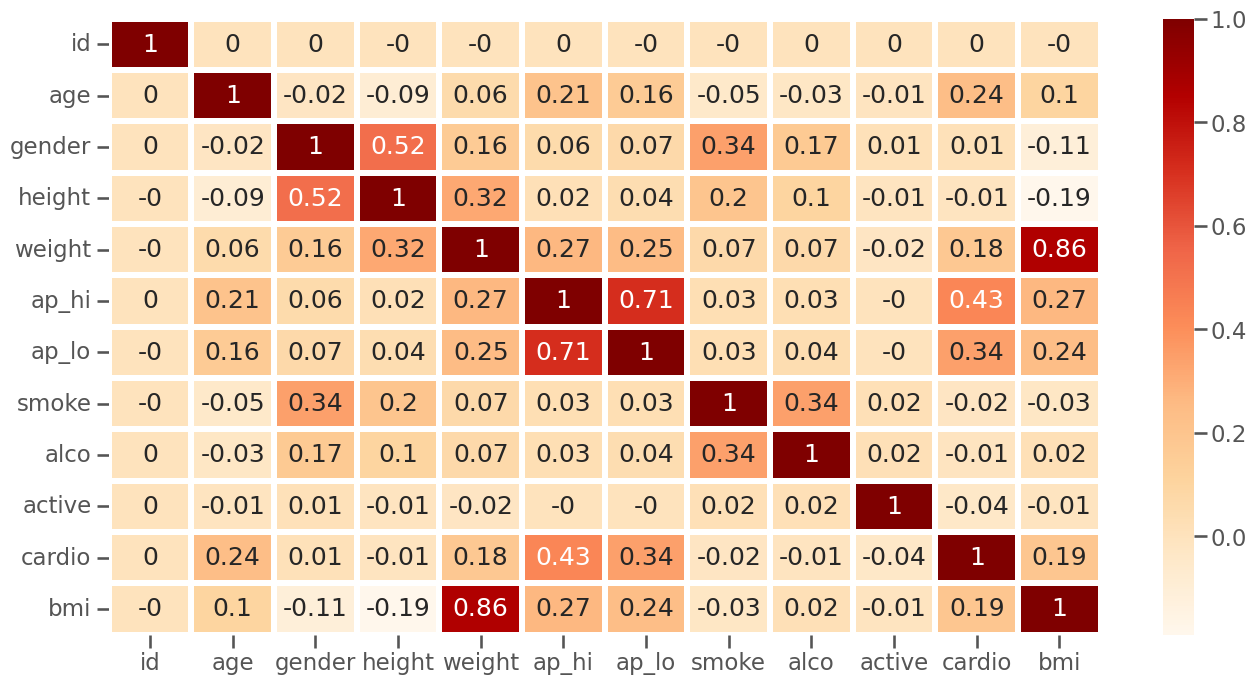

In [162]:
# Creating a dictionary to map the values
corr_smoke = {'Yes': 1, 'No': 0}
corr_alco = {'Yes': 1, 'No': 0}
corr_active = {'Yes': 1, 'No': 0}
corr_cardio = {'Yes': 1, 'No': 0}

# # Replacing the values in the dataframe to binary instead of categorical, this might help us with the correlation/deciding ML model
cardio_train_df['smoke'] = cardio_train_df['smoke'].replace(corr_smoke)
cardio_train_df['alco'] = cardio_train_df['alco'].replace(corr_alco)
cardio_train_df['active'] = cardio_train_df['active'].replace(corr_active)
cardio_train_df['cardio'] = cardio_train_df['cardio'].replace(corr_cardio)

# create heatmap and round correlation values to 2 decimal places
plt.figure(figsize=(16, 8))
corr = cardio_train_df.corr(numeric_only=True).round(2)
sns.heatmap(corr, annot=True, linewidths=3, cmap='OrRd')

# display plot
plt.show()

The highest correlation as we can see is weight and what the bmi is for the patient.
Then there is a correlation with bloodpressure

TODO: Write more about the conclusion

In [163]:
# TODO: 
# df = df.drop("total_phenols", axis=1)  
# Drop total_phenols since it is highly correlated with flavanoids
# att den har hög korrelation med en annan feature så får vi multicollinearity, vilket är dåligt för modellen
# Därför droppar vi

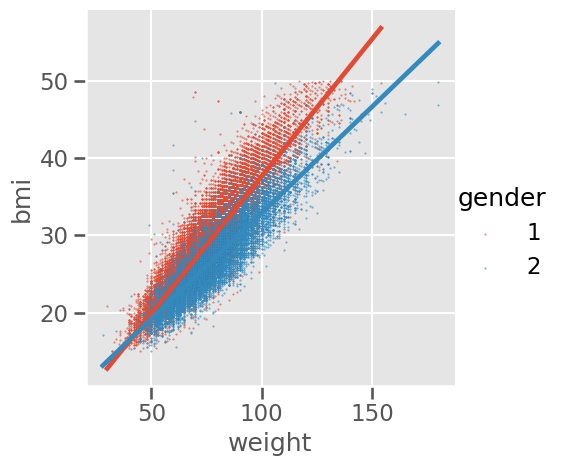

In [164]:
sns.lmplot(data=cardio_train_df, y='bmi', x='weight', hue='gender', scatter_kws={'s': 0.2, 'alpha': 0.8})

# Correlation

* weight and bmi has a high correlation
* ap_hi and ap lo has high correlation


# 2.3 Create two datasets

In [165]:
# creating the feature for the bmi in the first palce
def weight_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'normal'
    elif 25.0 <= bmi <= 29.9:
        return 'overweight'
    elif 30.0<= bmi <= 34.9:
        return 'obese 1'
    elif 35.0<= bmi <= 39.9:
        return 'obese 2'
    else:
        return 'obese 3'

cardio_train_df['bmi_category'] = cardio_train_df['bmi'].apply(weight_category)

In [166]:
cardio_train_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi',
       'normal_range', 'overweight', 'obese_class1', 'obese_class2',
       'obese_class3', 'BP_Category', 'bmi_category'],
      dtype='object')

In [167]:
copy_df = cardio_train_df.copy()

# dummy encoding of bmi-category, bloodpressure, gender
# First data frame
copy_df.drop(
    columns=[
        "ap_hi",
        "ap_lo",
        "height",
        "weight",
        "bmi",
        "normal_range",
        "overweight",
        "obese_class1",
        "obese_class2",
        "obese_class3",
    ],
    inplace=True,
)
copy_df = pd.get_dummies(copy_df, columns=["BP_Category", "gender", "cholesterol", "gluc", "bmi_category"], drop_first=True)

copy_df.head()

# is it possible to use linear regression on this data? or is it better to use a classification model?


id        age  smoke  alco  active  cardio  BP_Category_Healthy  \
0   0  50.391781      0     0       1       0                    0   
1   1  55.419178      0     0       1       1                    0   
2   2  51.663014      0     0       0       1                    0   
3   3  48.282192      0     0       1       1                    0   
4   4  47.873973      0     0       0       0                    1   

   BP_Category_Hypertension crisis  BP_Category_Stage 1 hyperpetension  \
0                                0                                   1   
1                                0                                   0   
2                                0                                   1   
3                                0                                   0   
4                                0                                   0   

   BP_Category_Stage 2 hyperpetension  gender_2  cholesterol_Normal  \
0                                   0         1                   1   
1                                   1         0                   0   
2                                   0         0                   0   
3                                   1         1                   1   
4                                   0         0                   1   

   cholesterol_Well above normal  gluc_Normal  gluc_Well above normal  \
0                              0            1                       0   
1                              1            1                       0   
2                              1            1                       0   
3                              0            1                       0   
4                              0            1                       0   

   bmi_category_obese 1  bmi_category_obese 2  bmi_category_obese 3  \
0                     0                     0                     0   
1                     0                     0                     1   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   bmi_category_overweight  bmi_category_underweight  
0                        0                         0  
1                        0                         0  
2                        0                         0  
3                        1                         0  
4                        0                         0

In [168]:
cardio_train_df['cholesterol'].unique()

array(['Normal', 'Well above normal', 'Above normal'], dtype=object)

In [169]:
# Second data frame

copy_df2 = cardio_train_df.copy()
copy_df2.drop(
    columns=[
        "bmi",
        "BP_Category",
        "height",
        "weight",
        "normal_range",
        "overweight",
        "obese_class1",
        "obese_class2",
        "obese_class3",
    ],
    inplace=True,
)

# TODO: Kanske one hot encoding för strings
# "cholesterol","bmi_category","gluc",
copy_df2 = pd.get_dummies(copy_df2, columns=["gender"], drop_first=True)
copy_df2.head()


id        age  ap_hi  ap_lo        cholesterol    gluc  smoke  alco  \
0   0  50.391781    110     80             Normal  Normal      0     0   
1   1  55.419178    140     90  Well above normal  Normal      0     0   
2   2  51.663014    130     70  Well above normal  Normal      0     0   
3   3  48.282192    150    100             Normal  Normal      0     0   
4   4  47.873973    100     60             Normal  Normal      0     0   

   active  cardio bmi_category  gender_2  
0       1       0       normal         1  
1       1       1      obese 3         0  
2       0       1       normal         0  
3       1       1   overweight         1  
4       0       0       normal         0

# 2.4 Choose ML modell

Choose 3-5 machine-learningmodels, do different ones that preferably isn't any similar. For every dataset that we created in 2.3 do the following.

* train|val|test split
* scale the dataset with feature standardization and normalization (note, they will not run simultanosley - but more in different rounds)
* define hyperparameters(param_grids) to test for every model
* use GridSearchCV() and pick a suitable evaluationmetric (MSE;RMSE;MAE)
* make predictions on val-data
* calculate and save evaluation scores for your choosen metric
* checkout TODO: finish this sentence

Which modell are you choosing?

Kanske att man faktiskt börjar med batch gradient descent, för att gå över till en likelihood logistic function



In [170]:
# Modells i wanna choose for this is linear regression
# GD Maybe batch?
# Regularization
# Gridsearch Pipeline

Model

Using linear regression to predict the disease. 
* I choose linear regression since we started do dummy encoding earlier on two datasets. # TODO: Write more
* If i get a value over 0.5 i have the disease.


# Logistic regression

## Sklearn - steps
Detta är ett recept som funkar för flera algoritmer

Typical steps
 *   1. train|test split, sometimes train|val|test split if you have large amounts of data
 *   2. scaling? sometimes required?
 *   - min-max scaling
 *   - standardization
 *   - ...
 *   - scale the training data, scale test data to the training data --> avoiding data leakage
 *       # Kan vara skala i statisik, t ex när man transformera till z för att standardisera data
 *   3. Fit algorithm to training data
 *       # Träning, alltså weights and biases. (Kan behövas datakraft från olika cloud kluster)
 *   4. Predict test data
 *       # Man har sina parametrar sen gör man prediction
 *   5. Evaluate
    

In [171]:
copy_df.head()

id        age  smoke  alco  active  cardio  BP_Category_Healthy  \
0   0  50.391781      0     0       1       0                    0   
1   1  55.419178      0     0       1       1                    0   
2   2  51.663014      0     0       0       1                    0   
3   3  48.282192      0     0       1       1                    0   
4   4  47.873973      0     0       0       0                    1   

   BP_Category_Hypertension crisis  BP_Category_Stage 1 hyperpetension  \
0                                0                                   1   
1                                0                                   0   
2                                0                                   1   
3                                0                                   0   
4                                0                                   0   

   BP_Category_Stage 2 hyperpetension  gender_2  cholesterol_Normal  \
0                                   0         1                   1   
1                                   1         0                   0   
2                                   0         0                   0   
3                                   1         1                   1   
4                                   0         0                   1   

   cholesterol_Well above normal  gluc_Normal  gluc_Well above normal  \
0                              0            1                       0   
1                              1            1                       0   
2                              1            1                       0   
3                              0            1                       0   
4                              0            1                       0   

   bmi_category_obese 1  bmi_category_obese 2  bmi_category_obese 3  \
0                     0                     0                     0   
1                     0                     0                     1   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   bmi_category_overweight  bmi_category_underweight  
0                        0                         0  
1                        0                         0  
2                        0                         0  
3                        1                         0  
4                        0                         0

In [172]:
X, y = copy_df.drop(columns=["cardio"]), copy_df["cardio"]

# Kanske måste göra one hot encoding på "string kategorierna" så att jag får med dem också.
# I nuläget går använder jag dem dock inte något.

# ttrain|val|test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# splitting again into train and validation sets (60-20-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)


print(X_train.shape)
print(X_val.shape) 
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(43735, 19)
(10934, 19)
(13668, 19)
(43735,)
(10934,)
(13668,)


Normalization (min-max feature scaling)
###  $X' = \frac{X-X_{\min}}{X_{max}-X_{min}}$

In [173]:
# def scale_data(scaler, scaled_X_train, scaled_X_val, scaled_test):
#     scaler = MinMaxScaler()
#     scaled_X_train = scaler.fit_transform(X_train)
#     scaled_X_val = scaler.transform(X_val)
#     scaled_X_test = scaler.transform(X_test)

#     return scaled_X_train, scaled_X_val, scaled_X_test

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

print(scaled_X_train.mean())
print(scaled_X_val.mean())
print(scaled_X_test.mean())

print(scaled_X_train.std())
print(scaled_X_val.std())
print(scaled_X_test.std())

0.308184058808511
0.30784631556998215
0.3084683310852343
0.4412803172905879
0.4412614471870501
0.4414692211508105


# Pipeline & gridsearch

In [174]:
# TODO: Fundera lite mer på vilken typ av scoring man vill ha. 
# Tänker mig att recall kan vara bra för att man vill inte missa någon som har risk för att få hjärt-kärl sjukdom
# Men eftersom det är många classer som obalanserade så kanske det är bättre att gå på F1 score istället
# För F1 ger mer en helheltsbild av modellens performance istället för 

In [175]:
# Models to use: KNN, Logistic, SVM, Decision_tress, random_forest

# TODO: Maybe come back to this later and write this as a function.
# def define_models(models=dict()):

# Constructing different pipelines for the different models

pipe_logistic = Pipeline([("scaler", scaler), ("logistic", LogisticRegression())])

pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

pipe_SVM = Pipeline([("scaler", scaler), ("svm", SVC())])

pipe_random_forest = Pipeline(
    [("scaler", scaler), ("random_forest", RandomForestClassifier())]
)

# Model

# Specify parameters to tune
# sag
# två underscore på parametern som vi tunear.
param_grid_logistic = {
    "logistic__C": np.linspace(0.01, 1, 10),
    "logistic__penalty": ["l2"],
}

param_grid_SVM = {
    "svm__C": [0.01, 0.1, 1, 10],
}

param_grid_random_forest = {
    "random_forest__n_estimators": [10, 50, 100, 200],
}

param_grid_KNN = {"knn__n_neighbors": list(range(1, 50))}

In [176]:
# Classifier 

classifier_logistic = GridSearchCV(estimator = pipe_logistic, param_grid = param_grid_logistic, cv=5, n_jobs=-1, scoring="accuracy")

classifier_KNN = GridSearchCV(pipe_KNN, param_grid_KNN, cv=5, n_jobs=-1, scoring="accuracy")

classifier_grid_SVM = GridSearchCV(pipe_SVM, param_grid_SVM, cv=5, n_jobs=-1, scoring="accuracy")

classifier_random_forest = GridSearchCV(pipe_random_forest, param_grid_random_forest, cv=5, n_jobs=-1, scoring="accuracy")


In [177]:
print(classifier_KNN)
print(classifier_logistic)
print(classifier_grid_SVM)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'logistic__penalty': ['l2']},
             scoring='accuracy')
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
           

In [253]:
print(classifier_random_forest)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('random_forest',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'random_forest__n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')


# Train Models

### KNN

In [181]:
# Training one model at the time
classifier_KNN.fit(scaled_X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [182]:
classifier_KNN.best_score_

0.6929918829312907

In [183]:
classifier_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=42))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(n_neighbors=42),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 42,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### Logistic

In [189]:
classifier_logistic.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'logistic__penalty': ['l2']},
             scoring='accuracy')

In [185]:
classifier_logistic.best_score_

0.700377272207614

In [186]:
classifier_logistic.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('logistic', LogisticRegression(C=0.23))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'logistic': LogisticRegression(C=0.23),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'logistic__C': 0.23,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

### Support Vector Classifier 

In [188]:
classifier_grid_SVM.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1, param_grid={'svm__C': [0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [191]:
classifier_grid_SVM.best_score_

0.6939979421515948

In [192]:
classifier_grid_SVM.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('svm', SVC(C=10))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'svm': SVC(C=10),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'svm__C': 10,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

### Random Forest

In [193]:
classifier_random_forest.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('random_forest',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'random_forest__n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [194]:
classifier_random_forest.best_score_

0.6628329713044472

In [195]:
classifier_random_forest.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('random_forest', RandomForestClassifier(n_estimators=200))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'random_forest': RandomForestClassifier(n_estimators=200),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'random_forest__bootstrap': True,
 'random_forest__ccp_alpha': 0.0,
 'random_forest__class_weight': None,
 'random_forest__criterion': 'gini',
 'random_forest__max_depth': None,
 'random_forest__max_features': 'sqrt',
 'random_forest__max_leaf_nodes': None,
 'random_forest__max_samples': None,
 'random_forest__min_impurity_decrease': 0.0,
 'random_forest__min_samples_leaf': 1,
 'random_forest__min_samples_split': 2,
 'random_forest__min_weight_fraction_leaf': 0.0,
 'random_forest__n_estimators': 200,
 'random_forest__n_jobs': None,
 'random_forest__oob_score': False,
 'random_forest__random_state': None,
 'random_forest__verbose': 0,
 'random_forest__warm_start': False}

# Prediction on validation data

### K-Nearest Neighbours

In [197]:
y_pred_KNN = classifier_KNN.predict(scaled_X_val)
y_pred_KNN

array([0, 0, 0, ..., 1, 1, 1])

In [248]:
# accuracy on train
print("The training accuracy is: ", classifier_KNN.score(scaled_X_train, y_train))

# Classification report 
print(classification_report(y_val, y_pred_KNN))

The training accuracy is:  0.709431805190351
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      5498
           1       0.71      0.63      0.67      5436

    accuracy                           0.69     10934
   macro avg       0.69      0.69      0.69     10934
weighted avg       0.69      0.69      0.69     10934



### Logistic

In [249]:
y_pred_logistic= classifier_KNN.predict(scaled_X_val)
y_pred_logistic

array([0, 0, 0, ..., 1, 1, 1])

In [251]:
# accuracy on train
print("The training accuracy is: ", classifier_logistic.score(scaled_X_train, y_train))

# Classification report
print(classification_report(y_val, y_pred_logistic))

The training accuracy is:  0.7008117068709272
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      5498
           1       0.71      0.63      0.67      5436

    accuracy                           0.69     10934
   macro avg       0.69      0.69      0.69     10934
weighted avg       0.69      0.69      0.69     10934



### Support Vector Classifier (SVC)

In [ ]:
y_pred_SVM = classifier_grid_SVM.predict(scaled_X_val)

# TODO: Ska man verkligen göra y_pred för SVM?

In [201]:
y_pred_SVM = classifier_grid_SVM.predict(scaled_X_val)
y_pred_SVM

array([0, 0, 0, ..., 1, 1, 0])

### Random forest

In [256]:
y_pred_random_forest = classifier_random_forest.predict(scaled_X_val)
y_pred_random_forest

array([0, 0, 0, ..., 1, 1, 0])

In [259]:
# Classification report
print(classification_report(y_val, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      5498
           1       0.66      0.65      0.66      5436

    accuracy                           0.66     10934
   macro avg       0.66      0.66      0.66     10934
weighted avg       0.66      0.66      0.66     10934



In [ ]:
# TODO: Test different scaling, standard scaler ( In pipeline)



In [ ]:
def plot_confusion_matrix(cm, classes=None, title="Confusion matrix"):
    """Plots a confusion matrix"""
    if classes is not None:
        sns.heatmap(
            cm,
            cmap="YlGnBu",
            xticklabels=classes,
            yticklabels=classes,
            vmin=0.0,
            vmax=1.0,
            annot=True,
            annot_kws={"size": 50},
        )
    else:
        sns.heatmap(cm, vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# log_req = LogisticRegression(penalty=None)

# log_req.fit(scaled_X_train, y_train) # estimated beta parameters
# log_req.coef_, log_req.intercept_ # beta parameters

In [ ]:
# pred_proba = log_req.predict_proba(scaled_X_train) # predicted probabilities
# pred_proba

In [ ]:
# print(log_req.predict(scaled_X_train)) # predicted classes
# print(log_req.predict(scaled_X_train).shape)

# y_pred = log_req.predict(scaled_X_train)


# # Threshold for classifying as 1 or 0
# threshold = 0.5
# (y_pred > threshold)


### Evaluation metrics for classification

Confusion matrix

||Pos prediction|Neg prediction|
|---|---|---|
|Pos class|TP|FN|:
|Neg class|FP|TN|

- accuracy - ratio of correct predictions to all predictions
- precision - number of positive class predictions that belong to positive class
- recall - sensitivity - number of positive class predictions out of all positive examples 
- $F_1$ score - harmonic mean between precision and recall 

$ acc = \frac{TP+TN}{Total} $

$ prec = \frac{TP}{TP+FP}$

$ rec = \frac{TP}{TP+FN}$

$ F_1 = 2\frac{prec\cdot recall}{prec + rec}$

In [ ]:
# # accuracy on train
# print("The training accuracy is: ", log_req.score(scaled_X_train, y_train))


# # scaled_X_val = scaler.transform(X_val)
# # scaled_X_test = scaler.transform(X_test)

# # y_val
# # y_test

# # accuracy on test
# print("The training accuracy is: ", log_req.score(X_test, y_test))




# # Classification report 
# print(classification_report(y_train, y_pred))

In [ ]:
def plot_confusion_matrix(cm, classes=None, title="Confusion matrix"):
    """Plots a confusion matrix"""
    if classes is not None:
        sns.heatmap(
            cm,
            cmap="YlGnBu",
            xticklabels=classes,
            yticklabels=classes,
            vmin=0.0,
            vmax=1.0,
            annot=True,
            annot_kws={"size": 50},
        )
    else:
        sns.heatmap(cm, vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


In [ ]:
# # Visualizing cm

# cm = confusion_matrix(y_train, y_pred)
# cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# plot_confusion_matrix(cm_norm, classes=log_req.classes_, title='Normalized confusion matrix')

What we can see is that number of 

In [ ]:
# TODO: Göra gridsearch för att hitta bästa parametrar för modellen.
 # Gör detta på X_val, y_val

# 2.5 Ensemble